In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
wine=pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.shape


(1599, 12)

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#checking for missing values in the dataset
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

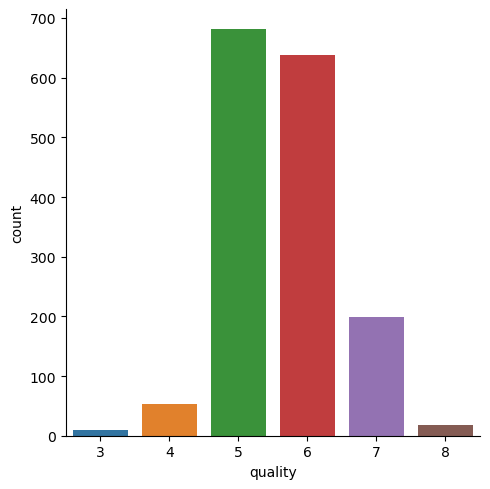

In [6]:
#data analysis and visualization
#number of values for each quality
sns.catplot(x='quality', data=wine, kind='count')



<Axes: xlabel='quality', ylabel='volatile acidity'>

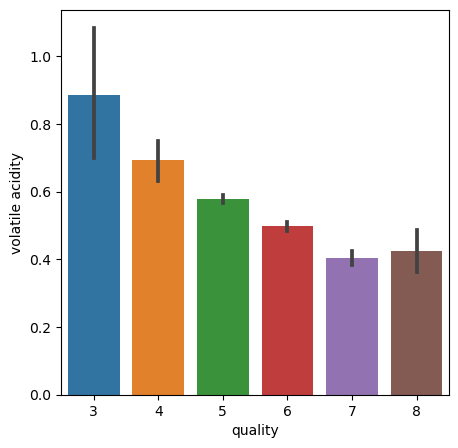

In [7]:
#volatile acidity vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

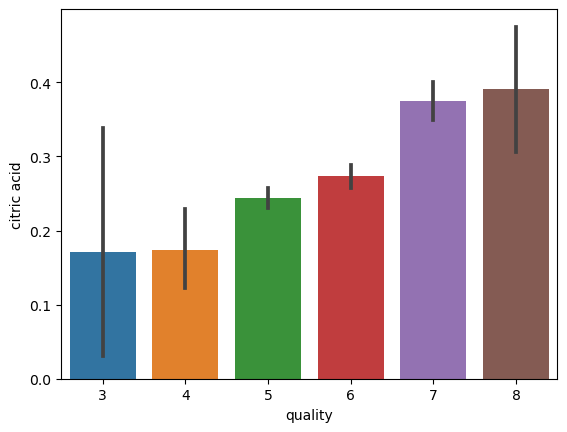

In [8]:
#citric acid vs quality
sns.barplot(x='quality',y='citric acid', data=wine)



<Axes: xlabel='quality', ylabel='alcohol'>

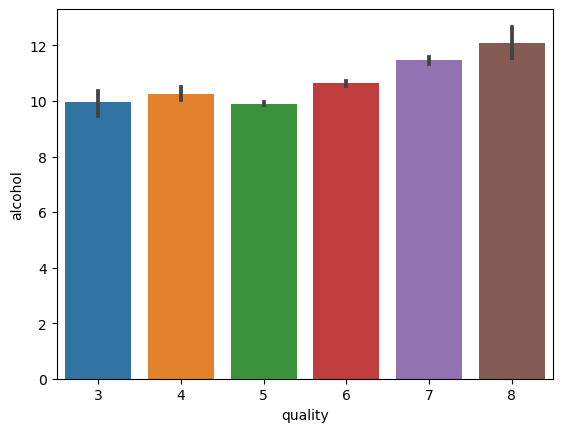

In [9]:
sns.barplot(x='quality',y='alcohol', data=wine)

<Axes: xlabel='quality', ylabel='pH'>

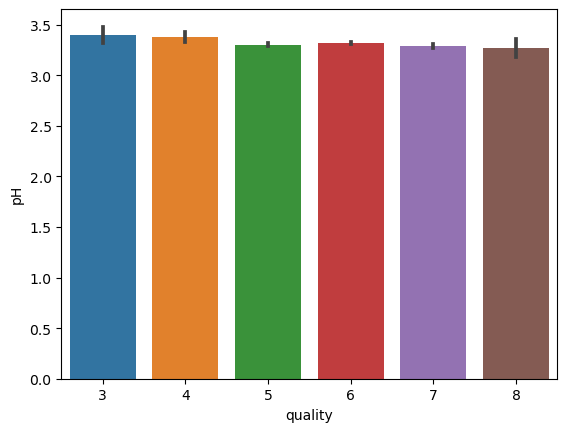

In [10]:
sns.barplot(x='quality',y='pH', data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

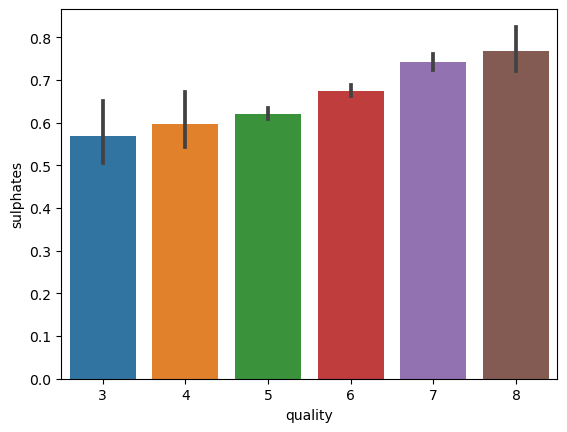

In [11]:
sns.barplot(x='quality',y='sulphates', data=wine)

<Axes: xlabel='quality', ylabel='density'>

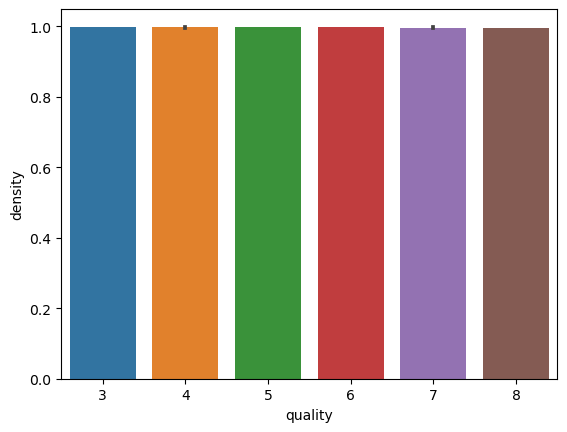

In [12]:
sns.barplot(x='quality',y='density', data=wine)

### correlation 
1. positive
2. negative

<Axes: >

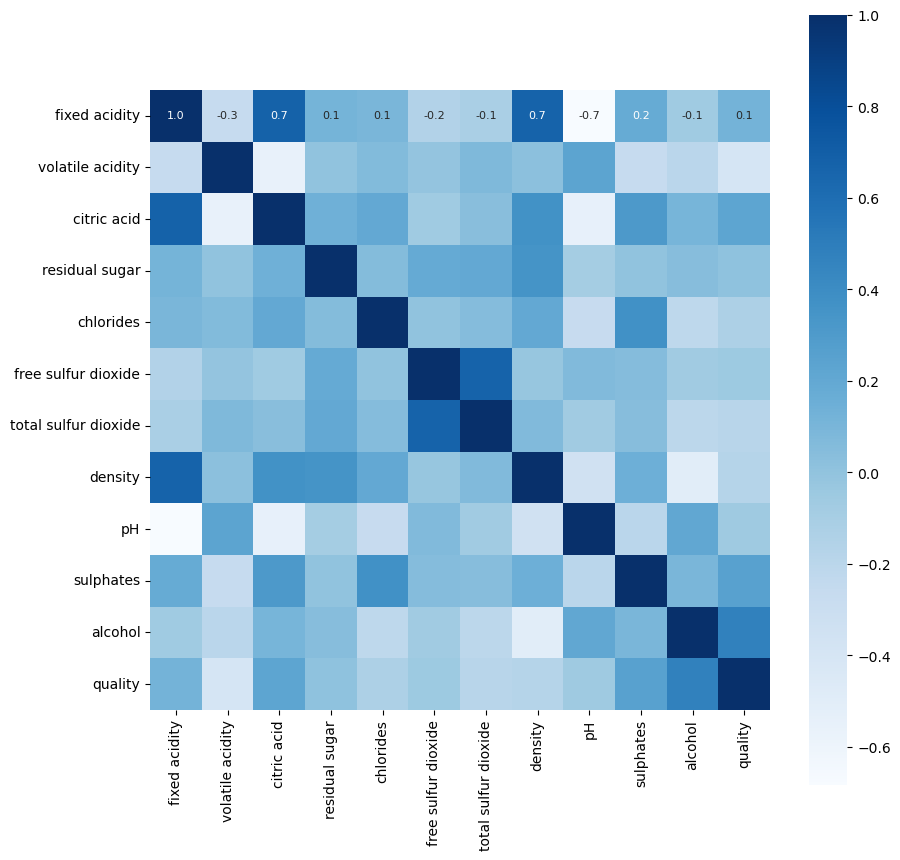

In [14]:
core=wine.corr()
#constructing a heat map to understand the correlation btween the columns
plt.figure(figsize=(10,10))
sns.heatmap(core, cbar=True, square= True, fmt= '.1f', annot= True, annot_kws={'size':8}, cmap='Blues')


In [15]:
#data processing
#separate the data label
X=wine.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [18]:
Y= wine['quality'].apply(lambda y_values: 1 if y_values>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [19]:
#train & test split
xtrain, xtest, ytrain, ytest= train_test_split(X,Y,test_size=0.2, random_state=3) 

In [20]:
print(Y.shape, ytrain.shape, ytest.shape)

(1599,) (1279,) (320,)


### Model Training
Random Forest Classifier


In [22]:
model= RandomForestClassifier()
model.fit(xtrain, ytrain)


RandomForestClassifier()

In [25]:
#evaluation
#accuracy test
xtest_prediction= model.predict(xtest)
test_data_accuracy=accuracy_score(xtest_prediction, ytest)

In [26]:
print("Accuracy:" , test_data_accuracy)

Accuracy: 0.93125


In [37]:
#building a predictive system
input_data= (7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4)

#changing the input data to numpy array
arr=np.asarray(input_data)


#Reshaping the data
input_data_reshape= arr.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction)
if(prediction==0):
    print("The Wine is not of good quality")
else:
    print("The Wine is of good quality")

[0]
The Wine is not of good quality


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
